In [95]:
import openml
import os
import pandas as pd
import pprint as pp
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble.forest import RandomForestClassifier
%matplotlib inline  
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 7.89 ms


In [2]:
apikey = "1dbab546719d8085308a5bfde18381d7"
openml.config.apikey = apikey
openml.config.set_cache_directory(os.path.expanduser('~/.openml/cache'))

time: 5.73 ms


In [15]:
tasks = openml.tasks.list_tasks(task_type_id=1)

In [16]:
tasks = pd.DataFrame.from_dict(tasks, orient='index')

In [58]:
task_ids = []
for index, row in tasks.iterrows():
    task_ids.append(row['tid'])

In [65]:
str(task_ids[1])

'3'

In [3]:
task_ids = [31]#, 10101, 9914, 145804, 146065, 146064, 125923, 3913, 3917, 9967, 3, 145872, 9946, 9957, 3918, 
           # 3903, 3493, 145862, 9971, 37, 3492, 145857]

time: 1.95 ms


In [2]:
runs = openml.runs.list_runs(task=str(31), size=50)
runs = pd.DataFrame.from_dict(runs, orient='index')
runs

,run_id,task_id,setup_id,flow_id,uploader
62,62,1,17,76,1
237,237,1,4,59,1
359,359,1,12,67,1
413,413,1,10,65,1
500,500,1,15,74,1
517,517,1,13,70,1
540,540,1,16,75,1
559,559,1,3,58,1
24688,24688,1,1,56,1
24987,24987,1,592,364,1


time: 1.65 s


In [7]:
accuracies.to_csv("task146065-10000.csv")

time: 185 ms


In [8]:
accuracies = pd.DataFrame(columns=['Flow','Accuracy'])
runs = openml.runs.list_runs(task=str(146064), size=10000)
runs = pd.DataFrame.from_dict(runs, orient='index')
num_runs = len(runs)
count = 0
for index, row in runs.iterrows():
    count += 1
    if count % 50 == 0:
        print("{}% complete".format(count/num_runs*100))
    run = openml.runs.get_run(row["run_id"])
    run = vars(run)
    flow = run['flow_name']
    accuracy = run['evaluations']['predictive_accuracy']
    accuracies = accuracies.append({'Flow':flow, 'Accuracy':accuracy}, ignore_index=True)

0.5% complete
1.0% complete
1.5% complete
2.0% complete
2.5% complete
3.0% complete
3.5000000000000004% complete
4.0% complete
4.5% complete
5.0% complete
5.5% complete
6.0% complete
6.5% complete
7.000000000000001% complete
7.5% complete
8.0% complete
8.5% complete
9.0% complete
9.5% complete
10.0% complete
10.5% complete
11.0% complete
11.5% complete
12.0% complete
12.5% complete
13.0% complete
13.5% complete
14.000000000000002% complete
14.499999999999998% complete
15.0% complete
15.5% complete
16.0% complete
16.5% complete
17.0% complete
17.5% complete
18.0% complete
18.5% complete
19.0% complete
19.5% complete
20.0% complete
20.5% complete
21.0% complete
21.5% complete
22.0% complete
22.5% complete
23.0% complete
23.5% complete
24.0% complete
24.5% complete
25.0% complete
25.5% complete
26.0% complete
26.5% complete
27.0% complete
27.500000000000004% complete
28.000000000000004% complete
28.499999999999996% complete
28.999999999999996% complete
29.5% complete
30.0% complete
30.5% 

/Users/JasonKatz/anaconda/lib/python3.6/site-packages/openml-0.6.0-py3.6.egg/openml/_api_calls.py:122: UserWarning: Received uncompressed content from OpenML for https://www.openml.org/api/v1/xml/run/6062674.
  warnings.warn('Received uncompressed content from OpenML for %s.' % url)


ExpatError: no element found: line 1, column 0

time: 21min 24s


In [6]:
accuracies

,Flow,Accuracy
0,weka.AdaBoostM1_DecisionStump(1),0.929825
1,weka.RandomTree(1),0.824561
2,weka.Bagging_REPTree(1),0.984410
3,weka.REPTree(1),0.681416
4,weka.JRip(1),0.984410
5,weka.IBk(1),0.842105
6,weka.Logistic(1),0.530973
7,weka.BayesNet_K2(1),0.961024
8,weka.SMO_RBFKernel(1),0.542035
9,weka.RandomForest(1),0.991091


time: 113 ms


In [25]:
accuracies.groupby(['Flow'])['Flow','Accuracy'].mean().sort_values(by=['Accuracy'], ascending=False)

,Accuracy
Flow,
weka.AdaBoostM1_REPTree(2),0.996659
weka.AdaBoostM1_BFTree(1),0.996659
weka.AdaBoostM1_REPTree(1),0.996659
classif.boosting(4),0.996659
weka.AdaBoostM1_JRip(3),0.996245
weka.MultiBoostAB_J48(3),0.996245
weka.MultiBoostAB_J48(1),0.996103
weka.AdaBoostM1_LMT(3),0.995932
weka.LWL_J48(3),0.995932


time: 273 ms


In [2]:
task31 = pd.read_csv("task31-5000.csv")

time: 59 ms


In [25]:
dd = task31.groupby(['Flow'])['Flow','Accuracy'].mean().sort_values(by=['Accuracy'], ascending=False).iloc[0:9]
dd

,Accuracy
Flow,
weka.AdaBoostM1_REPTree(2),0.996659
weka.AdaBoostM1_BFTree(1),0.996659
weka.AdaBoostM1_REPTree(1),0.996659
classif.boosting(4),0.996659
weka.AdaBoostM1_JRip(3),0.996245
weka.MultiBoostAB_J48(3),0.996245
weka.MultiBoostAB_J48(1),0.996102
weka.AdaBoostM1_LMT(3),0.995932
weka.LWL_J48(3),0.995932


time: 13.5 ms


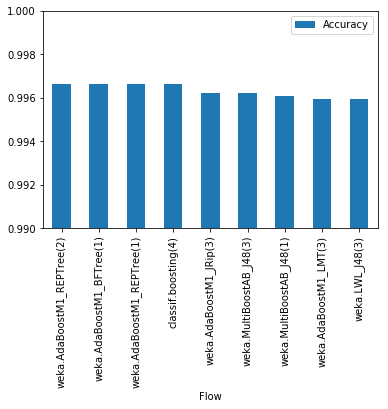

time: 309 ms


In [24]:
dd.plot(kind='bar', ylim=(.99,1))

In [102]:
pp.pprint(tasks.columns)

Index(['tid', 'ttid', 'did', 'name', 'task_type', 'status',
       'estimation_procedure', 'evaluation_measures', 'source_data',
       'target_feature', 'MajorityClassSize', 'MaxNominalAttDistinctValues',
       'MinorityClassSize', 'NumberOfClasses', 'NumberOfFeatures',
       'NumberOfInstances', 'NumberOfInstancesWithMissingValues',
       'NumberOfMissingValues', 'NumberOfNumericFeatures',
       'NumberOfSymbolicFeatures', 'cost_matrix'],
      dtype='object')


In [20]:
task = openml.tasks.get_task(31)

In [101]:
pp.pprint(vars(task))

{'class_labels': ['good', 'bad'],
 'cost_matrix': None,
 'dataset_id': 31,
 'estimation_parameters': {'number_folds': '10',
                           'number_repeats': '1',
                           'percentage': '',
                           'stratified_sampling': 'true'},
 'estimation_procedure': {'data_splits_url': 'https://www.openml.org/api_splits/get/31/Task_31_splits.arff',
                          'parameters': {'number_folds': '10',
                                         'number_repeats': '1',
                                         'percentage': '',
                                         'stratified_sampling': 'true'},
                          'type': 'crossvalidation'},
 'evaluation_measure': None,
 'split': None,
 'target_name': 'class',
 'task_id': 31,
 'task_type': 'Supervised Classification',
 'task_type_id': 1}


In [28]:
run = openml.runs.get_run(6725054)

In [83]:
pp.pprint(vars(run))

{'data_content': None,
 'dataset_id': 31,
 'error_message': None,
 'evaluations': {'area_under_roc_curve': 0.793695,
                 'average_cost': 0.0,
                 'f_measure': 0.776319,
                 'kappa': 0.451844,
                 'kb_relative_information_score': 216.558952,
                 'mean_absolute_error': 0.326795,
                 'mean_prior_absolute_error': 0.42016,
                 'number_of_instances': 1000.0,
                 'precision': 0.776847,
                 'predictive_accuracy': 0.786,
                 'prior_entropy': 0.881778,
                 'recall': 0.786,
                 'relative_absolute_error': 0.777789,
                 'root_mean_prior_squared_error': 0.458258,
                 'root_mean_squared_error': 0.400605,
                 'root_relative_squared_error': 0.874192,
                 'scimark_benchmark': 1307.41632633737,
                 'total_cost': 0.0,
                 'usercpu_time_millis': 2.46899999999998,
             

In [39]:
runs = openml.runs.list_runs(task="31", size=10000)

In [41]:
runs = pd.DataFrame.from_dict(runs, orient='index')

In [42]:
runs

,run_id,task_id,setup_id,flow_id,uploader
28,28,3,18,77,1
62,62,1,17,76,1
78,78,3,3,58,1
139,139,3,2,57,1
217,217,3,7,62,1
221,221,3,6,61,1
237,237,1,4,59,1
246,246,3,12,67,1
331,331,3,15,74,1
359,359,1,12,67,1


In [99]:
flow = openml.flows.get_flow(5804)

In [100]:
pp.pprint(vars(flow))

{'binary_format': None,
 'binary_md5': None,
 'binary_url': None,
 'class_name': 'sklearn.pipeline.Pipeline',
 'components': OrderedDict([('randomforestclassifier',
                             <openml.flows.flow.OpenMLFlow object at 0x111823be0>),
                            ('pca',
                             <openml.flows.flow.OpenMLFlow object at 0x1118b8c88>)]),
 'custom_name': None,
 'dependencies': 'sklearn==0.18.1\nnumpy>=1.6.1\nscipy>=0.9',
 'description': 'Automatically created scikit-learn flow.',
 'external_version': 'sklearn==0.18.1',
 'flow_id': 5804,
 'language': 'English',
 'model': Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_no...imators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, 

In [31]:
openml.flows.flow_exists('mlr.classif.ranger(13)', '1')

False

time: 965 ms


In [47]:
flowss = openml.flows.list_flows(20000)

time: 1.46 s


In [60]:
top_flows = dd.index.values

time: 1.79 ms


In [68]:
flow_ids = {}
for index,row in flow_df.iterrows():
    if row['full_name'] in top_flows:
        flow_ids[row['full_name']] = row['id']

time: 548 ms


In [67]:
flow_df = pd.DataFrame.from_dict(flowss, orient='index')

time: 72.1 ms


In [69]:
flow_ids

{'classif.boosting(4)': 2304,
 'weka.AdaBoostM1_BFTree(1)': 210,
 'weka.AdaBoostM1_JRip(3)': 2032,
 'weka.AdaBoostM1_LMT(3)': 3914,
 'weka.AdaBoostM1_REPTree(1)': 206,
 'weka.AdaBoostM1_REPTree(2)': 422,
 'weka.LWL_J48(3)': 3947,
 'weka.MultiBoostAB_J48(1)': 187,
 'weka.MultiBoostAB_J48(3)': 3981}

time: 3.98 ms


In [70]:
flow = openml.flows.get_flow(2304)
pp.pprint(vars(flow))

{'binary_format': None,
 'binary_md5': None,
 'binary_url': None,
 'class_name': None,
 'components': OrderedDict(),
 'custom_name': None,
 'dependencies': 'mlr_2.7, adabag_4.1, rpart_4.1.10',
 'description': 'Learner classif.boosting from package(s) adabag, rpart.',
 'external_version': 'R_3.2.3-4d51bce7',
 'flow_id': 2304,
 'language': 'English',
 'model': None,
 'name': 'classif.boosting',
 'parameters': OrderedDict([('boos', None),
                            ('coeflearn', None),
                            ('cp', None),
                            ('kind', 'Mersenne-Twister'),
                            ('maxcompete', None),
                            ('maxdepth', None),
                            ('maxsurrogate', None),
                            ('mfinal', None),
                            ('minbucket', None),
                            ('minsplit', None),
                            ('normal.kind', 'Inversion'),
                            ('seed', '1'),
                 

In [252]:
df_credit_g = pd.read_csv("dataset_31_credit-g.csv")
target_column = 'class'

time: 12.8 ms


In [253]:
factor_vars = [column[0] for column in df_credit_g.dtypes.iteritems() if column[1] == object and 
               column[0] != target_column]
df_credit_g = pd.get_dummies(df_credit_g, columns=factor_vars)

time: 17.3 ms


In [254]:
first_col = df_credit_g.columns[0]
X = np.array(df_credit_g[first_col])[:, np.newaxis]
for variable in df_credit_g[df_credit_g.columns.difference([target_column, first_col])]:
    X = np.hstack((X, np.array(df_credit_g[variable])[:, np.newaxis]))
le = LabelEncoder()
y = le.fit_transform(df_credit_g[target_column])

time: 22.7 ms


In [255]:
X[0]

array([   6,   67,    0,    1,    0,    0, 1169,    0,    1,    0,    0,
          0,    0,    0,    0,    1,    0,    2,    0,    1,    0,    1,
          0,    4,    0,    0,    0,    1,    1,    0,    0,    1,    0,
          1,    0,    0,    1,    0,    0,    0,    1,    0,    0,    1,
          0,    0,    0,    0,    0,    0,    0,    0,    1,    0,    0,
          4,    0,    0,    0,    0,    1])

time: 6.76 ms


In [256]:
# distribution of which ones have pipelines

time: 936 µs


In [257]:
pca = PCA()
rf = RandomForestClassifier()

time: 1.5 ms


In [258]:
pipe = Pipeline([('pca', pca), ('randomforestclassifier', rf)])

time: 2.85 ms


In [259]:
pipe.fit(X,y)

Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_no...imators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])

time: 97.1 ms


In [239]:
pipe.predict(X)

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1,

time: 20.8 ms


time: 1.34 ms


In [7]:
pca.PCA()

sklearn.decomposition.pca.PCA

time: 5.86 ms


In [1]:
import requests

In [3]:
r = requests.get("https://www.openml.org/api/v1/json/flow/5804?api_key=1dbab546719d8085308a5bfde18381d7")


r = requests.get("https://www.openml.org/api/v1/json/flow/list?api_key=1dbab546719d8085308a5bfde18381d7")
print(r.json())


{'flows': {'flow': [{'id': 1, 'full_name': 'openml.evaluation.EuclideanDistance(1.0)', 'name': 'openml.evaluation.EuclideanDistance', 'version': 1, 'external_version': '', 'uploader': 1}, {'id': 2, 'full_name': 'openml.evaluation.PolynomialKernel(1.0)', 'name': 'openml.evaluation.PolynomialKernel', 'version': 1, 'external_version': '', 'uploader': 1}, {'id': 3, 'full_name': 'openml.evaluation.RBFKernel(1.0)', 'name': 'openml.evaluation.RBFKernel', 'version': 1, 'external_version': '', 'uploader': 1}, {'id': 4, 'full_name': 'openml.evaluation.area_under_roc_curve(1.0)', 'name': 'openml.evaluation.area_under_roc_curve', 'version': 1, 'external_version': '', 'uploader': 1}, {'id': 5, 'full_name': 'openml.evaluation.average_cost(1.0)', 'name': 'openml.evaluation.average_cost', 'version': 1, 'external_version': '', 'uploader': 1}, {'id': 6, 'full_name': 'openml.evaluation.build_cpu_time(1.0)', 'name': 'openml.evaluation.build_cpu_time', 'version': 1, 'external_version': '', 'uploader': 1}, 